## 학습률의 적용
- 어떤수를 입력하면 100을 곱해서 출력하는 모델을 제작

In [9]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class
# from keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.2~
# from tensorflow.keras.models import Sequential  # class
# from tensorflow.keras.models import load_model  # model 파일 로딩
# from tensorflow.keras.layers import Dense       # 전결합층
# from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900 2000]


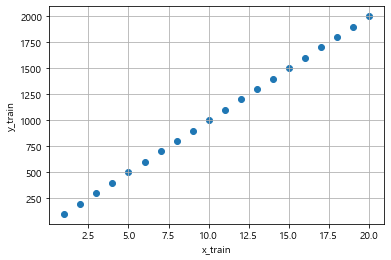

In [10]:
x_train = np.array([i for i in range(1, 21)]) # 데이터
print(x_train) # 독립 변수
y_train = np.array([i*100 for i in range(1, 21)]) # 정답, 실제값, Target
print(y_train) # 종속 변수: 독립변수 * 100

plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

In [11]:
### 학습률 10 지정
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값은 이전 Layer의 노드수 10개
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer=Adam(lr=10), loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 13ms/step - loss: 73462974.0074 - val_loss: 38818380.0000
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 30323418.6765 - val_loss: 840789.5625
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 3278703.3732 - val_loss: 1775097.8750
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 2880556.2426 - val_loss: 1559630.1250
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 

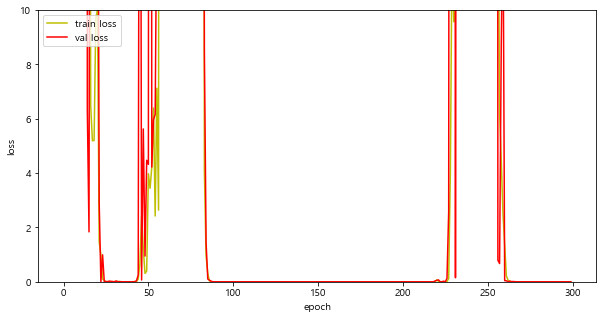

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 10.0000]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [13]:
### 학습률 0.1 지정
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값은 이전 Layer의 노드수 10개
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer=Adam(lr=0.1), loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 12ms/step - loss: 462081.4995 - val_loss: 2054219.0000
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 340798.3487 - val_loss: 69314.2578
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 7861.3834 - val_loss: 20378.7383
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 7212.6326 - val_loss: 23625.1133
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 3009.6333 - val_

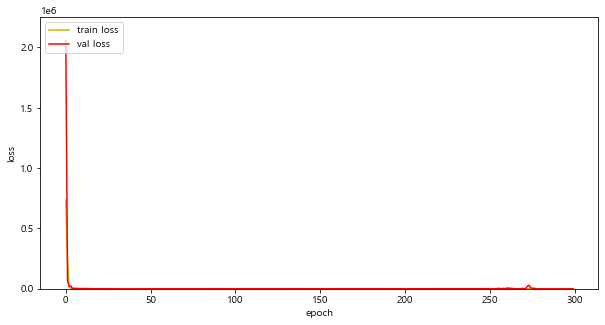

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2252675.7500]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [15]:
### 학습률 0.01 지정
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값은 이전 Layer의 노드수 10개
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer=Adam(lr=0.01), loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 11ms/step - loss: 1030720.0147 - val_loss: 3281141.0000
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 844426.2353 - val_loss: 3192615.5000
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 827471.8971 - val_loss: 3075524.0000
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 881329.8456 - val_loss: 2926980.0000
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 59949

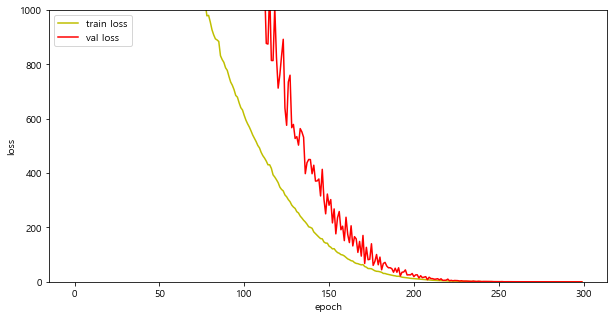

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1000]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [19]:
### 학습률 0.001 지정, 학습률을 지정하지 않았을때와 동일한 값, 기본값 
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값은 이전 Layer의 노드수 10개
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer=Adam(lr=0.001), loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 11ms/step - loss: 750650.1553 - val_loss: 3392220.2500
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 1144247.0147 - val_loss: 3383901.5000
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 816991.4228 - val_loss: 3376492.5000
Epoch 4/300
16/16 [==============================] - ETA: 0s - loss: 1189174.500 - 0s 4ms/step - loss: 1115055.4449 - val_loss: 3368112.0000
Epoch 5/300
16/16 [============================

Epoch 69/300
16/16 [==============================] - 0s 4ms/step - loss: 662456.5882 - val_loss: 2373663.0000
Epoch 70/300
16/16 [==============================] - 0s 4ms/step - loss: 474973.6296 - val_loss: 2352043.0000
Epoch 71/300
16/16 [==============================] - 0s 4ms/step - loss: 852283.2537 - val_loss: 2327010.2500
Epoch 72/300
16/16 [==============================] - 0s 4ms/step - loss: 603945.5800 - val_loss: 2305157.0000
Epoch 73/300
16/16 [==============================] - 0s 4ms/step - loss: 764376.4816 - val_loss: 2281623.5000
Epoch 74/300
16/16 [==============================] - 0s 4ms/step - loss: 537927.5386 - val_loss: 2260781.0000
Epoch 75/300
16/16 [==============================] - 0s 4ms/step - loss: 647609.7610 - val_loss: 2237475.7500
Epoch 76/300
16/16 [==============================] - 0s 4ms/step - loss: 644223.1710 - val_loss: 2215438.0000
Epoch 77/300
16/16 [==============================] - 0s 4ms/step - loss: 879732.0441 - val_loss: 2189930.5000
E

16/16 [==============================] - 0s 4ms/step - loss: 244364.9706 - val_loss: 771745.4375
Epoch 143/300
16/16 [==============================] - 0s 4ms/step - loss: 259161.3631 - val_loss: 752930.1250
Epoch 144/300
16/16 [==============================] - 0s 4ms/step - loss: 126974.8826 - val_loss: 738562.2500
Epoch 145/300
16/16 [==============================] - 0s 4ms/step - loss: 185018.3676 - val_loss: 720386.0000
Epoch 146/300
16/16 [==============================] - 0s 4ms/step - loss: 247347.0579 - val_loss: 702097.5625
Epoch 147/300
16/16 [==============================] - 0s 4ms/step - loss: 190638.0625 - val_loss: 685990.2500
Epoch 148/300
16/16 [==============================] - 0s 4ms/step - loss: 151392.0308 - val_loss: 670341.8125
Epoch 149/300
16/16 [==============================] - 0s 4ms/step - loss: 126758.9428 - val_loss: 654173.7500
Epoch 150/300
16/16 [==============================] - 0s 4ms/step - loss: 131764.3286 - val_loss: 637967.0000
Epoch 151/300
1

Epoch 216/300
16/16 [==============================] - 0s 3ms/step - loss: 9902.0524 - val_loss: 63757.8125
Epoch 217/300
16/16 [==============================] - 0s 4ms/step - loss: 10889.0934 - val_loss: 61026.7188
Epoch 218/300
16/16 [==============================] - 0s 4ms/step - loss: 11734.5258 - val_loss: 58481.1523
Epoch 219/300
16/16 [==============================] - 0s 4ms/step - loss: 8447.5524 - val_loss: 56071.4688
Epoch 220/300
16/16 [==============================] - 0s 4ms/step - loss: 12010.8618 - val_loss: 53516.0117
Epoch 221/300
16/16 [==============================] - 0s 4ms/step - loss: 8793.0544 - val_loss: 51344.0039
Epoch 222/300
16/16 [==============================] - 0s 4ms/step - loss: 15935.7549 - val_loss: 48957.6406
Epoch 223/300
16/16 [==============================] - 0s 4ms/step - loss: 8426.8721 - val_loss: 47101.2148
Epoch 224/300
16/16 [==============================] - 0s 4ms/step - loss: 7275.5630 - val_loss: 45096.0469
Epoch 225/300
16/16 [===

16/16 [==============================] - 0s 4ms/step - loss: 2067.6073 - val_loss: 5333.4668
Epoch 293/300
16/16 [==============================] - 0s 4ms/step - loss: 1680.4601 - val_loss: 5252.6406
Epoch 294/300
16/16 [==============================] - 0s 4ms/step - loss: 2100.8410 - val_loss: 5180.2891
Epoch 295/300
16/16 [==============================] - 0s 4ms/step - loss: 1731.1111 - val_loss: 5136.2964
Epoch 296/300
16/16 [==============================] - 0s 4ms/step - loss: 1569.7030 - val_loss: 5053.0913
Epoch 297/300
16/16 [==============================] - 0s 4ms/step - loss: 1541.4657 - val_loss: 4963.7085
Epoch 298/300
16/16 [==============================] - 0s 4ms/step - loss: 1640.0384 - val_loss: 4907.6313
Epoch 299/300
16/16 [==============================] - 0s 4ms/step - loss: 2008.7653 - val_loss: 4933.7949
Epoch 300/300
16/16 [==============================] - 0s 4ms/step - loss: 1814.4914 - val_loss: 4831.1309


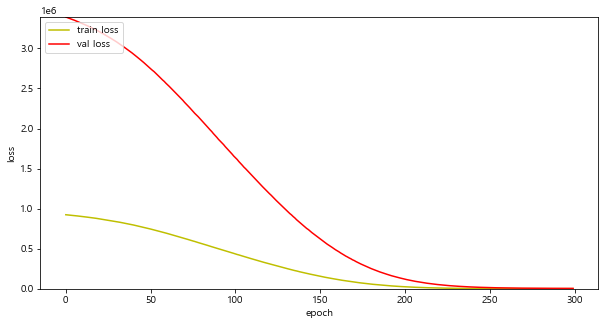

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3392220.2500]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [22]:
### 학습률 0.0005 지정
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값은 이전 Layer의 노드수 10개
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer=Adam(lr=0.0005), loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 12ms/step - loss: 1364810.0551 - val_loss: 3415696.0000
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 994415.8088 - val_loss: 3412381.5000
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 910157.0643 - val_loss: 3408985.7500
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 1145685.7721 - val_loss: 3405244.0000
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 7090

16/16 [==============================] - 0s 4ms/step - loss: 812019.2243 - val_loss: 3069545.2500
Epoch 70/300
16/16 [==============================] - 0s 4ms/step - loss: 883084.1654 - val_loss: 3062303.0000
Epoch 71/300
16/16 [==============================] - 0s 4ms/step - loss: 889187.0882 - val_loss: 3055386.2500
Epoch 72/300
16/16 [==============================] - 0s 4ms/step - loss: 651086.3686 - val_loss: 3048029.5000
Epoch 73/300
16/16 [==============================] - 0s 4ms/step - loss: 871286.4957 - val_loss: 3039924.0000
Epoch 74/300
16/16 [==============================] - 0s 3ms/step - loss: 942193.9596 - val_loss: 3032300.7500
Epoch 75/300
16/16 [==============================] - 0s 4ms/step - loss: 763276.9713 - val_loss: 3025076.5000
Epoch 76/300
16/16 [==============================] - 0s 4ms/step - loss: 1216587.8456 - val_loss: 3016754.0000
Epoch 77/300
16/16 [==============================] - 0s 3ms/step - loss: 643444.5735 - val_loss: 3009928.5000
Epoch 78/300


16/16 [==============================] - 0s 4ms/step - loss: 597966.8563 - val_loss: 2382134.0000
Epoch 143/300
16/16 [==============================] - 0s 4ms/step - loss: 615804.2169 - val_loss: 2371558.7500
Epoch 144/300
16/16 [==============================] - 0s 4ms/step - loss: 520954.3915 - val_loss: 2360834.5000
Epoch 145/300
16/16 [==============================] - 0s 4ms/step - loss: 728588.3713 - val_loss: 2349222.5000
Epoch 146/300
16/16 [==============================] - 0s 4ms/step - loss: 496587.7647 - val_loss: 2338703.5000
Epoch 147/300
16/16 [==============================] - 0s 4ms/step - loss: 467052.7569 - val_loss: 2327142.5000
Epoch 148/300
16/16 [==============================] - 0s 4ms/step - loss: 699890.4338 - val_loss: 2315260.7500
Epoch 149/300
16/16 [==============================] - 0s 4ms/step - loss: 678021.5841 - val_loss: 2303452.0000
Epoch 150/300
16/16 [==============================] - 0s 4ms/step - loss: 672689.5331 - val_loss: 2292339.7500
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 414662.9816 - val_loss: 1533384.0000
Epoch 216/300
16/16 [==============================] - 0s 4ms/step - loss: 409758.6912 - val_loss: 1522115.5000
Epoch 217/300
16/16 [==============================] - 0s 4ms/step - loss: 404909.2592 - val_loss: 1510763.7500
Epoch 218/300
16/16 [==============================] - 0s 4ms/step - loss: 463857.2849 - val_loss: 1498609.0000
Epoch 219/300
16/16 [==============================] - 0s 4ms/step - loss: 484033.0000 - val_loss: 1486683.0000
Epoch 220/300
16/16 [==============================] - 0s 4ms/step - loss: 506990.7904 - val_loss: 1475036.7500
Epoch 221/300
16/16 [==============================] - 0s 4ms/step - loss: 346574.3197 - val_loss: 1464665.5000
Epoch 222/300
16/16 [==============================] - 0s 4ms/step - loss: 329604.5741 - val_loss: 1453509.1250
Epoch 223/300
16/16 [==============================] - 0s 4ms/step - loss: 250654.7486 - val_loss: 1443248.0000
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 191244.8428 - val_loss: 779386.8125
Epoch 289/300
16/16 [==============================] - 0s 4ms/step - loss: 208112.9010 - val_loss: 770253.6875
Epoch 290/300
16/16 [==============================] - 0s 4ms/step - loss: 155297.9168 - val_loss: 762149.0625
Epoch 291/300
16/16 [==============================] - 0s 4ms/step - loss: 171411.5094 - val_loss: 753191.9375
Epoch 292/300
16/16 [==============================] - 0s 4ms/step - loss: 197380.4072 - val_loss: 744242.5000
Epoch 293/300
16/16 [==============================] - 0s 4ms/step - loss: 270925.7748 - val_loss: 735213.2500
Epoch 294/300
16/16 [==============================] - 0s 4ms/step - loss: 167353.5975 - val_loss: 727500.3750
Epoch 295/300
16/16 [==============================] - 0s 4ms/step - loss: 155844.6425 - val_loss: 719529.5625
Epoch 296/300
16/16 [==============================] - 0s 4ms/step - loss: 148584.6464 - val_loss: 711006.3750
Epoch 297/300
1

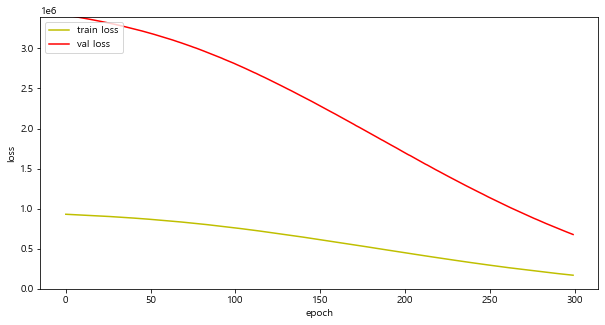

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3392220.2500]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.